In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import make_nice_plots
make_nice_plots()


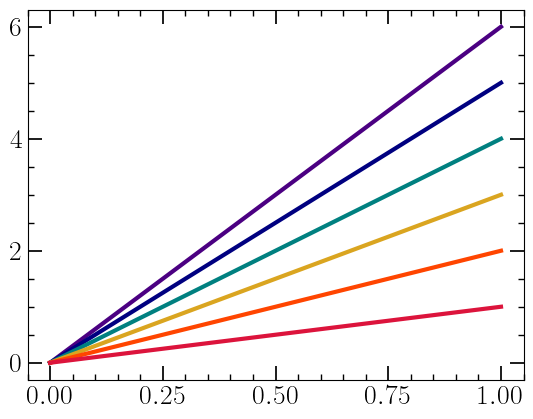

In [16]:
xx = np.linspace(0, 1, 100)
plt.figure()
plt.plot(xx, 6 * xx, color='indigo', linewidth=3)
plt.plot(xx, 5 * xx, color='navy', linewidth=3)
plt.plot(xx, 4 * xx, color='teal', linewidth=3)
plt.plot(xx, 3 * xx, color='goldenrod', linewidth=3)
plt.plot(xx, 2 * xx, color='orangered', linewidth=3)
plt.plot(xx, 1 * xx, color='crimson', linewidth=3)
plt.show()


In [22]:
def remove_infs(data):
    inf_idx = []
    for i in range(data.shape[0]):
        log_llh = data[i,:,:]
        if np.sum(np.isinf(log_llh)) != 0:
            inf_idx.append(i)
    
    remove_idx = [x for x in range(data.shape[0]) if x not in inf_idx]
    return data[remove_idx,:,:]


def ecdf(a):
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1]

In [85]:
alldata = remove_infs( np.load('posteriors_BATCH_100_PRIMARY_MASS_ERROR_40.npy') )
# alldata = remove_infs( np.load('posteriors_AGNZERROR_0.05_BATCH_100_GWDISTERR_0.05_ZMAX_1.5_NAGN_100.npy') )
# alldata = remove_infs( np.load('posteriors_AGNZERROR_0.05_BATCH_100_GWDISTERR_0.05_ZMAX_1.5_NAGN_100_PRIMARY_MASS_ERROR_40.npy') )
print(alldata.shape)

post1 = np.sum(alldata, axis=0)

(10, 1000, 21)


In [86]:
# post2 = np.sum( remove_infs(np.load('posteriors_replaceFalse_relerr0.2_1kAGN_trunc25.npy')), axis=0)
# print(post2.shape)

# post3 = np.sum( remove_infs(np.load('posteriors_replaceFalse_relerr0.2_100AGN_trunc14.npy')), axis=0)
# print(post3.shape)

# post4 = np.sum( remove_infs(np.load('posteriors_replaceFalse_relerr0.2_100AGN_trunc15.npy')), axis=0)
# print(post4.shape)

# # post5 = np.sum(np.load('posteriors_replaceFalse_relerr0.001_100AGN_abs6.npy'), axis=0)
# # print(post5.shape)

# # post6 = np.sum(np.load('posteriors_replaceFalse_relerr0.001_100AGN_abs7.npy'), axis=0)
# # print(post6.shape)


In [87]:
print(np.sum(np.isinf(alldata)))
print(np.sum(np.isnan(alldata)))
# for i in range(1000):
#     print(np.sum(np.isinf(data[i,...])))

0
0


In [88]:
# # data = alldata[450:550,:,:]#[np.newaxis,:,:]
start = 0
every = 1
data = alldata[start::every,...]
print(data.shape)
post1 = np.sum(data, axis=0)
# data = np.append(alldata, alldata2, axis=0)
# print(data.shape)


combined_posteriors = post1 #+ post2 #+ post3 + post4 #+ post5 + post6
print(combined_posteriors.shape)
print(np.max(combined_posteriors), np.min(combined_posteriors))


(10, 1000, 21)
(1000, 21)
-5065.510775961951 -5265.682456664433


In [89]:
print(combined_posteriors)

[[-5085.32611404 -5133.41565359 -5153.94176837 ... -5209.56435591
  -5248.51611101 -5189.79707329]
 [-5085.32499162 -5133.41785416 -5153.91968169 ... -5209.33335126
  -5248.25787404 -5189.55144956]
 [-5085.32409222 -5133.4203032  -5153.89785781 ... -5209.10270069
  -5248.00005504 -5189.30618841]
 ...
 [-5191.97861728 -5253.60194781 -5252.83004461 ... -5105.27083492
  -5126.387591   -5065.5567833 ]
 [-5192.22531402 -5253.88155157 -5253.08957756 ... -5105.28332527
  -5126.37703152 -5065.53366534]
 [-5192.47247555 -5254.16175517 -5253.34969963 ... -5105.29611721
  -5126.36672315 -5065.51077596]]


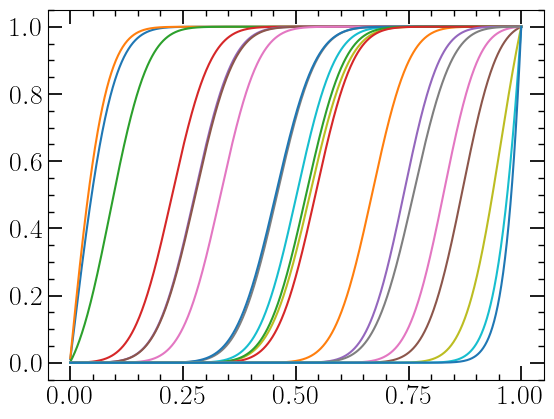

[0.13410873 0.11875927 0.18453553 0.21874639 0.21858219 0.22097249
 0.21781365 0.22514011 0.22658893 0.21806375 0.22862614 0.21389413
 0.22029273 0.21790381 0.20562381 0.19528932 0.19871998 0.2212534
 0.14882905 0.10005635 0.07965247]


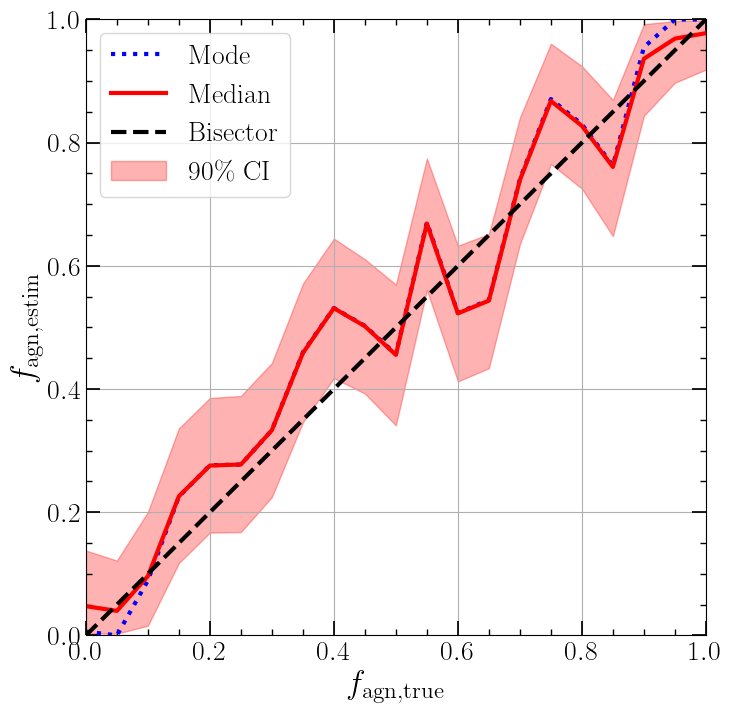

In [ ]:
####################################################################
BATCH = int(100)
N_MC_SAMPS = int(1e4)
MAX_N_FAGNS = combined_posteriors.shape[1]
CALC_LOGLLH_AT_N_POINTS = combined_posteriors.shape[0] # Only change if you want higher resolution

NGW_ALT = BATCH
NGW_AGN = BATCH
N_TRUE_FAGNS = min(BATCH + 1, MAX_N_FAGNS)  # Cannot create more f_agn values than BATCH+1 and don't want to generate more than MAX_N_FAGNS
LOG_LLH_X_AX = np.linspace(0.0001, 0.9999, CALC_LOGLLH_AT_N_POINTS)

USE_N_AGN_EVENTS = np.arange(0, BATCH + 1, int(BATCH / (N_TRUE_FAGNS - 1)), dtype=np.int32)
TRUE_FAGNS = USE_N_AGN_EVENTS / BATCH
####################################################################

from scipy.interpolate import interp1d

combined_posteriors -= np.max(combined_posteriors, axis=0)
pdf = np.exp(combined_posteriors)
cdfs = np.cumsum(pdf, axis=0)
cdfs /= np.max(cdfs, axis=0)

q005 = np.zeros_like(TRUE_FAGNS)
q050 = np.zeros_like(TRUE_FAGNS)
q095 = np.zeros_like(TRUE_FAGNS)
plt.figure()
plt.plot(LOG_LLH_X_AX, cdfs)
for i, cdf in enumerate(cdfs.T):
    inverse_cdf = interp1d(cdf, LOG_LLH_X_AX, bounds_error=False, fill_value='extrapolate')
    q005[i] = inverse_cdf(0.05)
    q050[i] = inverse_cdf(0.50)
    q095[i] = inverse_cdf(0.95)
plt.show()

print(q095 - q005)

estimated_fagns = LOG_LLH_X_AX[np.argmax(combined_posteriors, axis=0)]

plt.figure(figsize=(8,8))
plt.plot(TRUE_FAGNS, estimated_fagns, color='blue', linewidth=3, label='Mode', linestyle='dotted')
plt.plot(TRUE_FAGNS, q050, color='red', linewidth=3, label='Median')
# plt.plot(TRUE_FAGNS, old_estimates, color='blue', linewidth=3, label='Old')
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100), linestyle='dashed', color='black', zorder=6, linewidth=3, label='Bisector')
plt.fill_between(TRUE_FAGNS, q005, q095, color='red', alpha=0.3, label=r'$90\%$ CI')
plt.xlabel(r'$f_{\rm agn, true}$')
plt.ylabel(r'$f_{\rm agn, estim}$')
plt.grid()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
# plt.savefig('abserr.pdf')
plt.show()

# relative_estimates = estimated_fagns - TRUE_FAGNS
# # old_relative_estimates = old_estimates - TRUE_FAGNS
# plt.figure(figsize=(8,8))
# plt.plot(TRUE_FAGNS, relative_estimates, color='red', linewidth=3, label='New')
# # plt.plot(TRUE_FAGNS, old_relative_estimates, color='blue', linewidth=3, label='Old')
# # plt.plot(TRUE_FAGNS, np.mean(relative_estimates, axis=0), color='blue', linewidth=3, label='Mean')
# plt.plot(np.linspace(0,1,100), np.zeros(100), linestyle='dashed', color='black', zorder=6, linewidth=3)
# # plt.fill_between(TRUE_FAGNS, q016, q084, color='red', alpha=0.3, label=r'$68\%$ CI')
# plt.xlabel(r'$f_{\rm agn, true}$')
# plt.ylabel(r'$f_{\rm agn, estim} - f_{\rm agn, true}$')
# plt.grid()
# plt.legend()
# plt.xlim(0, 1)
# # plt.savefig('abserr_diff.pdf')
# plt.show()


0.0021016016016016017
0.5535428428428429
0.9999


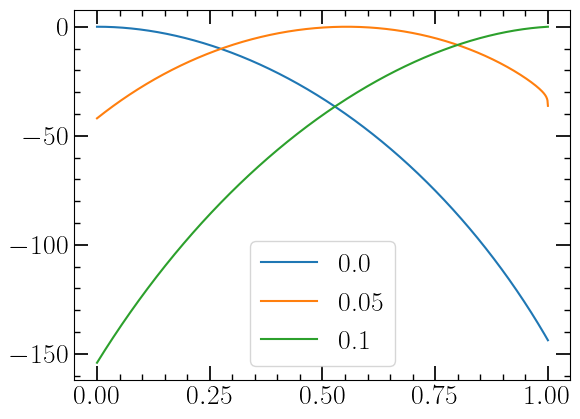

In [82]:
plt.figure()
for fagn, posterior in zip(TRUE_FAGNS, combined_posteriors.T[::10]):
    plt.plot(LOG_LLH_X_AX, posterior, label=fagn)
    print(LOG_LLH_X_AX[np.argmax(posterior)])
plt.legend()
plt.show()


Text(0.5, 0, '$f_{\\rm agn}$')

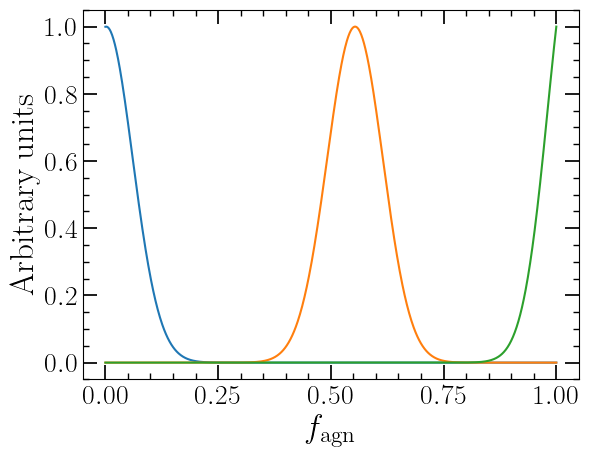

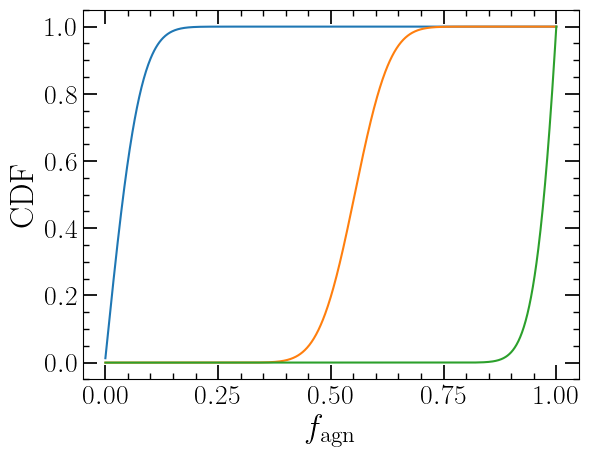

In [83]:
from scipy.interpolate import interp1d

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
for i in [0, combined_posteriors.shape[1] // 2, -1]:
    posterior = combined_posteriors[:,i]
    posterior -= np.max(posterior)
    pdf = np.exp(posterior)
    cdf = np.cumsum(pdf)
    cdf /= np.max(cdf)

    inverse_cdf = interp1d(cdf, LOG_LLH_X_AX)
    x_84 = inverse_cdf(0.84)
    x_16 = inverse_cdf(0.16)

    ax1.plot(LOG_LLH_X_AX, pdf)
    ax2.plot(LOG_LLH_X_AX, cdf)
# plt.xlim(0, 0.1)
ax1.set_ylabel('Arbitrary units')
ax1.set_xlabel(r'$f_{\rm agn}$')
ax2.set_ylabel('CDF')
ax2.set_xlabel(r'$f_{\rm agn}$')

# print(np.min(posterior))

In [52]:
from scipy import stats
from scipy.optimize import curve_fit

def gaussian(x, mu, sigma):
    return stats.norm.pdf(x, mu, sigma)


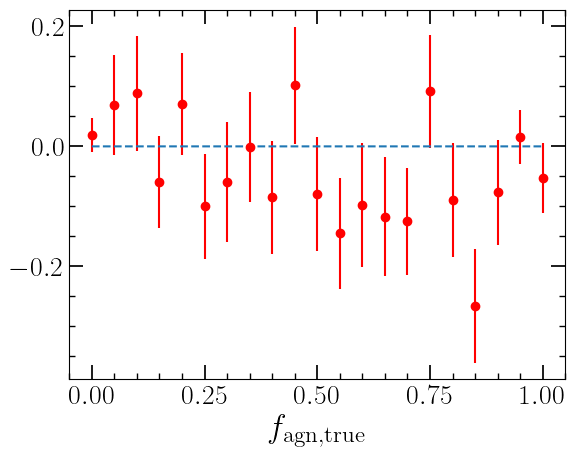

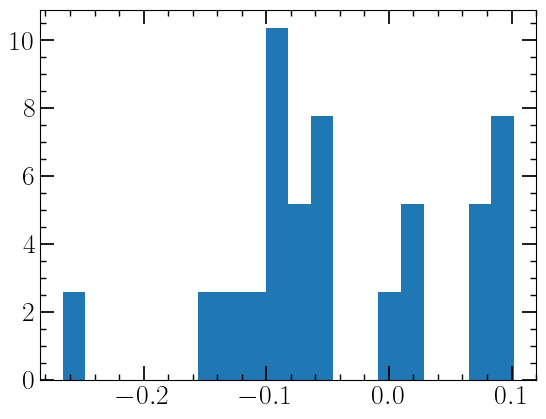

In [53]:
xx = np.linspace(0, 1, 10000)

plt.figure()
estimates = np.zeros_like(TRUE_FAGNS)
for i in range(N_TRUE_FAGNS):
    posterior = combined_posteriors[:,i].copy()
    posterior -= np.max(posterior)
    posterior = np.exp(posterior)
    posterior /= np.trapezoid(posterior, LOG_LLH_X_AX)
    param, _ = curve_fit(gaussian, LOG_LLH_X_AX, posterior)
    estimates[i] = param[0] - TRUE_FAGNS[i]

    plt.errorbar(TRUE_FAGNS[i], param[0] - TRUE_FAGNS[i], yerr=param[1], color='red', marker='o', linestyle=' ')
plt.plot(xx, np.zeros_like(xx), linestyle='dashed')

# plt.plot(LOG_LLH_X_AX, posterior)
# plt.plot(xx, gaussian(xx, *p))
# plt.xlim(p[0] - 0.025, p[0] + 0.025)
# plt.ylabel('Arbitrary units')
plt.xlabel(r'$f_{\rm agn, true}$')
plt.show()

plt.figure()
plt.hist(estimates, bins=20, density=True)
plt.show()


1000it [00:05, 181.56it/s]


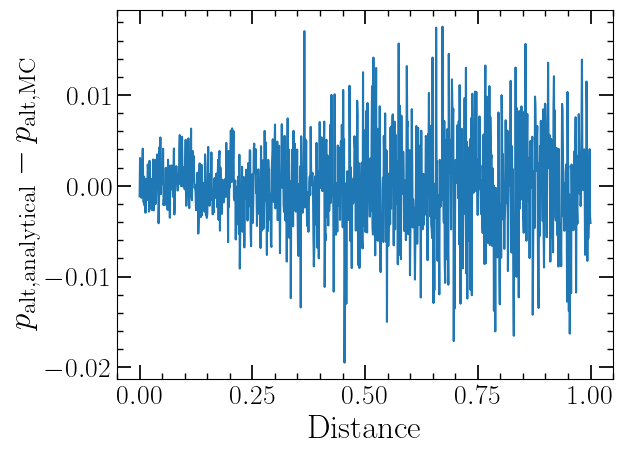

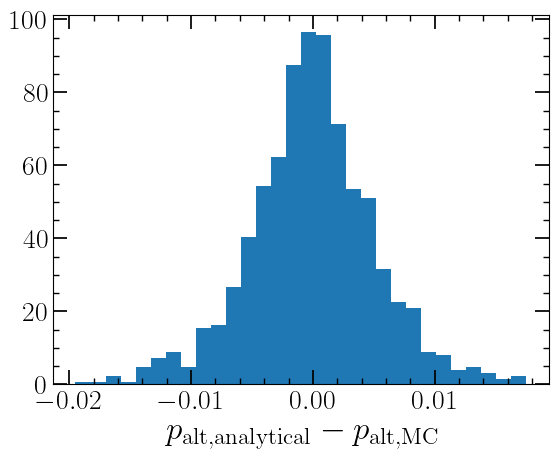

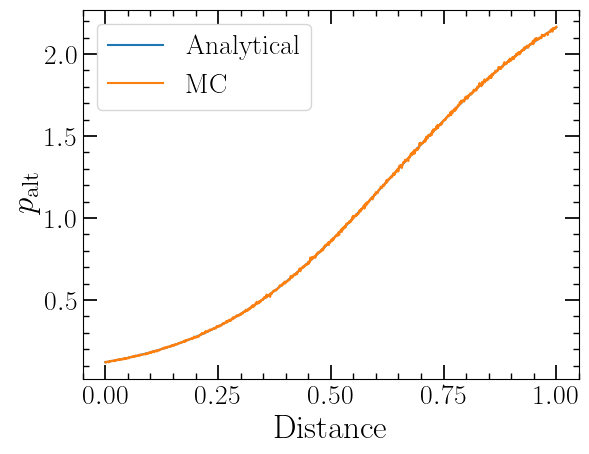

In [13]:
from scipy.integrate import quad
from scipy.stats import truncnorm, norm
from tqdm import tqdm
from scipy.special import erf
from scipy.interpolate import interp1d


def integral_truncnorm_times_prior(mu, sig=0.2, rmin=0, rmax=1):
    '''
    normalization * int_0^rmax x^2 e^(-(x - mu)^2/(2sigma^2)) dx

    x - mu = X
    dx = dX
    x = 0 -> X = -mu
    x = rmax -> X = rmax - mu
    
    normalization * int_{-mu}^{rmax - mu} (X + mu)^2 e^{-X^2 / (2sig^2)} dX
    '''
    # Phi = lambda x: 0.5 * (1 + erf(x / np.sqrt(2)))
    Phi = lambda x: norm.cdf(x, loc=0, scale=1)

    integral = lambda x: np.sqrt(np.pi / 2) * sig * (sig**2 + mu**2) * erf(x / (np.sqrt(2) * sig)) - sig**2 * np.exp(-x**2 / (2 * sig**2)) * (2 * mu + x)
    definite_integral = integral(rmax - mu) - integral(-mu)
    normalization = (3 / rmax**3) * (1 / (sig * (Phi((rmax - mu) / sig) - Phi((rmin - mu) / sig)) )) / np.sqrt(2 * np.pi)
    return normalization * definite_integral


def dVdr_prior(r, rmax=1):
    '''Uniform in volume distribution on radius, normalized between 0 and rmax.'''
    return np.where((r < rmax) & (r > 0), r**2 / rmax**3 * 3, 0)

n_integrals = 1000
abs_dist_err = 0.2
pos = np.linspace(0, 1, n_integrals)
results = np.zeros(n_integrals)
mc_results = np.zeros(n_integrals)
for i, obs_loc in tqdm( enumerate(pos) ):
    func = lambda x: dVdr_prior(x) * truncnorm.pdf(x, a=(0 - obs_loc) / abs_dist_err, b=(1 - obs_loc) / abs_dist_err, loc=obs_loc, scale=abs_dist_err)
    results[i] = quad(func, 0, 1)[0]

    n_mc_samps = int(1e4)
    samps = truncnorm.rvs(a=(0 - obs_loc) / abs_dist_err, b=(1 - obs_loc) / abs_dist_err, loc=obs_loc, scale=abs_dist_err, size=n_mc_samps)
    p_alt = np.sum( dVdr_prior(samps, 1) ) / n_mc_samps

    mc_results[i] = p_alt

diffs = results - mc_results

plt.figure()
plt.plot(pos, diffs)
plt.xlabel('Distance')
plt.ylabel(r'$p_{\rm alt, analytical} - p_{\rm alt, MC}$')
plt.show()

plt.figure()
plt.hist(diffs, density=True, bins=30)
plt.xlabel(r'$p_{\rm alt, analytical} - p_{\rm alt, MC}$')
plt.show()

plt.figure()
plt.plot(pos, results, label='Analytical')
plt.plot(pos, mc_results, label='MC')
plt.legend()
plt.xlabel('Distance')
plt.ylabel(r'$p_{\rm alt}$')
plt.show()


In [14]:
from utils import fast_z_at_value
from default_arguments import *
import astropy.units as u
from astropy.constants import c

####################################################################
SPEED_OF_LIGHT_KMS = c.to('km/s').value
GW_DIST_ERR = 0.2  # Relative error
COMDIST_MIN = 0
COMDIST_MAX = 5000  # Maximum comoving distance in Mpc
VOLUME = 4 / 3 * np.pi * COMDIST_MAX**3
AGN_NUMDENS = 100 / VOLUME
BATCH = int(100)
N_POST_SAMPS = int(1e4)
N_MC_SAMPS = int(1e3)
N_TRIALS = 1000
MAX_N_FAGNS = 51
CALC_LOGLLH_AT_N_POINTS = 1000

# All subsequent globals are derived from the parameters above.
NAGN = int( np.ceil(AGN_NUMDENS * VOLUME) )

rr = np.linspace(COMDIST_MIN, COMDIST_MAX, 1000)
assert NAGN >= BATCH, 'Every AGN-origin GW must come from a unique AGN. Got {NAGN} AGN and {BATCH} AGN-origin GWs.'
print(f'#AGN is rounded from {AGN_NUMDENS * VOLUME} to {NAGN}, giving a number density of {NAGN / VOLUME:.3e}. Target was {AGN_NUMDENS:.3e}.')
NGW_ALT = BATCH
NGW_AGN = BATCH
N_TRUE_FAGNS = min(BATCH + 1, MAX_N_FAGNS)  # Cannot create more f_agn values than BATCH+1 and don't want to generate more than MAX_N_FAGNS
LOG_LLH_X_AX = np.linspace(0.0001, 0.9999, CALC_LOGLLH_AT_N_POINTS)

COSMO = DEFAULT_COSMOLOGY
ZMIN = 1e-4
ZMAX = fast_z_at_value(COSMO.comoving_distance, COMDIST_MAX * u.Mpc)
LUMDIST_MIN = COSMO.luminosity_distance(ZMIN).value
LUMDIST_MAX = COSMO.luminosity_distance(ZMAX).value

USE_GW_SELECTION_EFFECTS = False
LUMDIST_THRESH_GW = LUMDIST_MAX  # Luminosity distance threshold in Mpc

## These lines are for making the underlying truth equal to the actual realization of that truth - TODO: CURRENTLY BINOMIAL OPTION DOESN'T WORK
USE_N_AGN_EVENTS = np.arange(0, BATCH + 1, int(BATCH / (N_TRUE_FAGNS - 1)), dtype=np.int32)
TRUE_FAGNS = USE_N_AGN_EVENTS / BATCH
REALIZED_FAGNS = USE_N_AGN_EVENTS / BATCH  # Realization of the truth

LUMDIST_AT_MAX_REDSHIFT = COSMO.luminosity_distance(999).value  # For removing errors in generating posteriors later
####################################################################




#AGN is rounded from 100.0 to 100, giving a number density of 1.910e-10. Target was 1.910e-10.


10000it [00:05, 1703.61it/s]


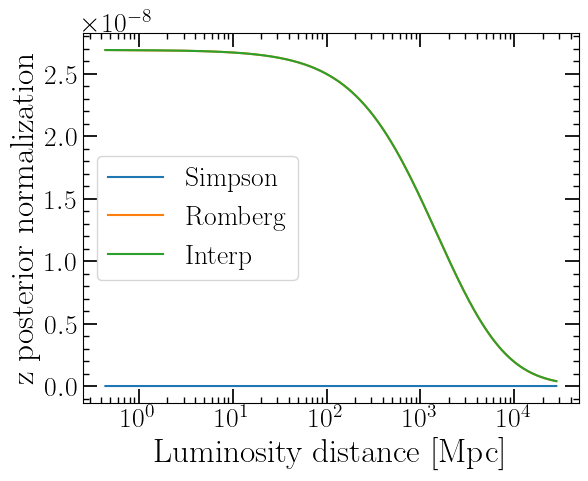

In [70]:
def dVdz_unnorm(z, cosmo):
    '''Assuming flat LCDM'''
    Omega_m = cosmo.Om0
    Omega_Lambda = 1 - Omega_m
    E_of_z = np.sqrt((1 + z)**3 * Omega_m + Omega_Lambda)
    com_vol = ((1 + z) * cosmo.angular_diameter_distance(z).value)**2 / E_of_z
    return com_vol


func = lambda z: dVdz_unnorm(z, COSMO)
# zz = np.linspace(ZMIN, ZMAX, 1000)
# NORM = simpson(y=func(zz), x=zz)
NORM = quad(func, ZMIN, ZMAX)[0]  # NORMALIZE UP TO ZMAX, since p_rate(z > ZMAX) = 0


def dVdz_prior(z, norm=NORM, cosmo=COSMO):
    z = np.atleast_1d(z)
    result = np.zeros_like(z)
    within_limits = (z < ZMAX) & (z > ZMIN)
    result[within_limits] = dVdz_unnorm(z[within_limits], cosmo) / norm
    return result


def generate_posterior(rlum_obs, rlum_relerr=GW_DIST_ERR, n_posterior_samples=N_POST_SAMPS):
    # Importance resampling of distances
    dtrue_postsamps = rlum_obs / (1 + rlum_relerr * np.random.normal(size=4 * n_posterior_samples))
    neg = dtrue_postsamps < LUMDIST_MIN
    if np.sum(neg) != 0:
        print(f'removing {np.sum(neg)} negative lumdist samples')
    dtrue_postsamps = dtrue_postsamps[~neg]  # WARNING: Negative values are very rare, (20% (30%) error, 50k (100k) postsamps, 1 (180) negative samp), so just remove them. But be aware!
    weights = dtrue_postsamps / np.sum(dtrue_postsamps)  # Importance weights proportional to d
    lumdist_samples = np.random.choice(dtrue_postsamps, size=2 * n_posterior_samples, p=weights)
    
    n_samps_above_max_z = np.sum(lumdist_samples > LUMDIST_AT_MAX_REDSHIFT)
    if n_samps_above_max_z != 0:
        lumdist_samples = lumdist_samples[lumdist_samples < LUMDIST_AT_MAX_REDSHIFT]
        print(f'Removing {n_samps_above_max_z} samples at too high luminosity distance ({LUMDIST_AT_MAX_REDSHIFT:.2f}).')
    
    # Redshift reweighting
    z_samples = fast_z_at_value(COSMO.luminosity_distance, lumdist_samples * u.Mpc)
    H_z = COSMO.H(z_samples).value  # H(z) in km/s/Mpc
    chi_z = (1 + z_samples) * lumdist_samples
    dDL_dz = chi_z + (1 + z_samples) * (SPEED_OF_LIGHT_KMS / H_z)
    z_weights = 1 / dDL_dz
    z_weights /= np.sum(z_weights)
    z_samples = np.random.choice(z_samples, n_posterior_samples, p=z_weights)
    return lumdist_samples, z_samples


def unnormed_lumdist_distribution(d, dobs, sigma):
    return np.exp(-(dobs/d - 1)**2 / (2 * sigma**2)) / d


# def lumdist_distribution(d, dobs, sigma):
#     func = lambda x: unnormed_lumdist_distribution(x, dobs=dobs, sigma=sigma)
#     dd = np.geomspace(dobs / 10, dobs * 10, 10000)
#     norm = simpson(y=func(dd), x=dd)
#     return unnormed_lumdist_distribution(d, dobs, sigma) / norm


def unnormed_redshift_distribution(z, dobs, sigma):
    dl = COSMO.luminosity_distance(z).value
    H_z = COSMO.H(z).value  # H(z) in km/s/Mpc
    chi_z = (1 + z) * dl
    dDL_dz = chi_z + (1 + z) * (SPEED_OF_LIGHT_KMS / H_z)
    return unnormed_lumdist_distribution(dl, dobs, sigma) / dDL_dz

from scipy.integrate import simpson, romb
from scipy.interpolate import CubicSpline

n_norms = 10000
redshift_norm_z_axis = np.geomspace(ZMIN / 10, 10 * ZMAX, 10000)
romb_z_axis = np.geomspace(ZMIN / 10, 10 * ZMAX, 513)  #np.linspace(ZMIN, ZMAX, 8193)
# print(np.diff(np.log10(romb_z_axis)))
# sys.exit(1)

znorms = np.zeros(n_norms)
znorms_trapz = np.zeros(n_norms)
znorms_quad = np.zeros(n_norms)
znorms_romb = np.zeros(n_norms)
trial_lumdist = np.linspace(LUMDIST_MIN, 2 * LUMDIST_MAX, n_norms)
for i, dobs in tqdm(enumerate(trial_lumdist)):
    # func = lambda x: unnormed_redshift_distribution(x, dobs, sigma=GW_DIST_ERR)
    # znorms[i] = simpson(y=func(redshift_norm_z_axis), x=redshift_norm_z_axis)

    func = lambda x: unnormed_redshift_distribution(x, dobs, sigma=GW_DIST_ERR) * x * np.log(10)
    znorms_romb[i] = romb(y=func(romb_z_axis), dx=np.diff(np.log10(romb_z_axis))[0])

    # znorms_trapz[i] = np.trapezoid(y=func(redshift_norm_z_axis), x=redshift_norm_z_axis)
    # znorms_quad[i] = quad(func, min(redshift_norm_z_axis), max(redshift_norm_z_axis))[0]
znorms_interp = CubicSpline(trial_lumdist, znorms_romb)
# znorms_interp_quad = interp1d(trial_lumdist, znorms_quad)

lumdist_interp_axis = np.linspace(LUMDIST_MIN, 2 * LUMDIST_MAX, 10 * n_norms)
plt.figure()
plt.plot(trial_lumdist, znorms, label='Simpson')
plt.plot(trial_lumdist, znorms_romb, label='Romberg')
plt.plot(lumdist_interp_axis, znorms_interp(lumdist_interp_axis), label='Interp')
# plt.plot(trial_lumdist, znorms_trapz, label='Trapezoid')
# plt.plot(trial_lumdist, znorms_quad, label='Quad')
plt.semilogx()
plt.legend()
plt.xlabel('Luminosity distance [Mpc]')
plt.ylabel('z posterior normalization')
plt.show()


def redshift_distribution(z, dobs, sigma):
    func = lambda x: unnormed_redshift_distribution(x, dobs, sigma) * x * np.log(10)
    # norm = znorms_interp(dobs)
    norm = romb(y=func(romb_z_axis), dx=np.diff(np.log10(romb_z_axis))[0])
    
    func = lambda x: unnormed_redshift_distribution(x, dobs, sigma)
    return func(z) / norm


def redshift_posterior_times_alt_prior(z, obs_dl, dl_err):
    return redshift_distribution(z, obs_dl, dl_err) * dVdz_prior(z)

# def redshift_distribution_quad(z, dobs, sigma):
#     func = lambda x: unnormed_redshift_distribution(x, dobs, sigma)
#     norm = znorms_interp_quad(dobs)
#     return func(z) / norm

# def redshift_posterior_times_alt_prior_quad(z, obs_dl, dl_err):
#     return redshift_distribution_quad(z, obs_dl, dl_err) * dVdz_prior(z)


1it [00:00,  8.91it/s]

removing 20226 negative lumdist samples


52it [00:03, 19.11it/s]

removing 1 negative lumdist samples


100it [00:04, 21.52it/s]


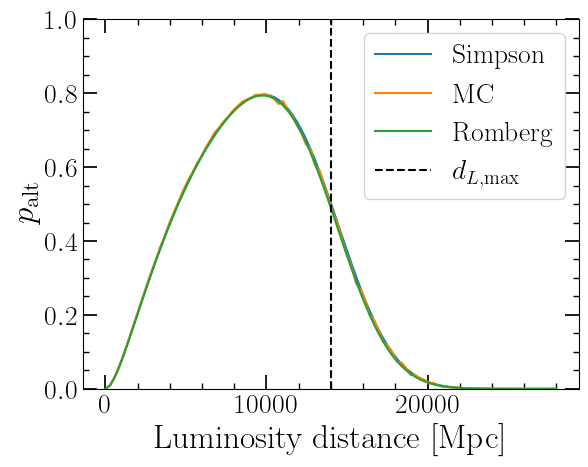

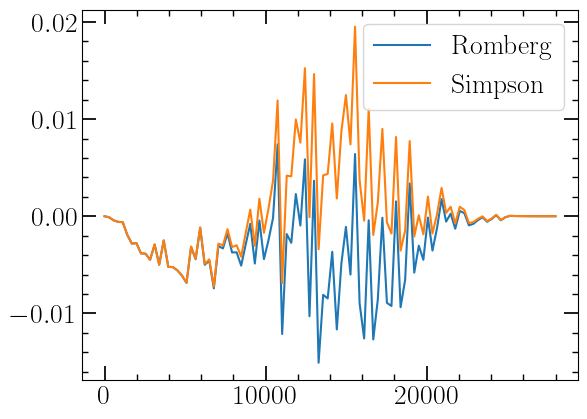

In [86]:
# print(LUMDIST_AT_MAX_REDSHIFT)
# obs_dl = 10000
# dl_err = 0.2
# dl, z = generate_posterior(obs_dl, rlum_relerr=dl_err, n_posterior_samples=int(1e4))
# xx = np.linspace(obs_dl / 10, 3 * obs_dl, 1000)
# zz = fast_z_at_value(COSMO.luminosity_distance, xx * u.Mpc)
# print(zz[0], zz[-1])
# plt.figure()
# # plt.plot(xx, lumdist_distribution(xx, obs_dl, dl_err))
# # plt.hist(dl, density=True, bins=100)

# func = lambda x: unnormed_redshift_distribution(x, obs_dl, dl_err)
# norm = znorms_interp(obs_dl)
# normquad = quad(func, ZMIN, 5 * ZMAX)[0]
# print(norm, normquad)
# plt.plot(zz, unnormed_redshift_distribution(zz, obs_dl, dl_err) / normquad)
# plt.plot(zz, redshift_distribution(zz, obs_dl, dl_err))
# plt.hist(z, density=True, bins=100)
# plt.xlabel('Redshift')
# plt.show()

def p_alt_integral(redshift_integral_axis, obs_dl, gw_dist_err=GW_DIST_ERR):
    func = lambda x: redshift_posterior_times_alt_prior(x, obs_dl, gw_dist_err)
    return simpson(y=func(redshift_integral_axis), x=redshift_integral_axis)


def p_alt_romb(redshift_integral_axis, obs_dl, gw_dist_err=GW_DIST_ERR):
    func = lambda x: redshift_posterior_times_alt_prior(x, obs_dl, gw_dist_err) * np.log(10) * x
    return romb(y=func(redshift_integral_axis), dx=np.diff(np.log10(redshift_integral_axis))[0])


n_integrals = 100
results = np.zeros(n_integrals)
# quad_results = np.zeros(n_integrals)
mc_results = np.zeros(n_integrals)
romb_results = np.zeros(n_integrals)
trial_lumdist = np.linspace(LUMDIST_MIN, 2 * LUMDIST_MAX, n_integrals)
zz = np.linspace(ZMIN, ZMAX, 1000)
romb_z_ax = np.geomspace(ZMIN, ZMAX, 513)
for i, dl in tqdm( enumerate(trial_lumdist) ):
    # func = lambda x: redshift_posterior_times_alt_prior(x, dl, GW_DIST_ERR)
    # results[i] = quad(func, ZMIN, ZMAX)[0]
    results[i] = p_alt_integral(zz, dl)

    # func_quad = lambda x: redshift_posterior_times_alt_prior_quad(x, dl, GW_DIST_ERR)
    # quad_results[i] = quad(func_quad, ZMIN, ZMAX)[0]

    _, zsamps = generate_posterior(dl, rlum_relerr=GW_DIST_ERR, n_posterior_samples=N_POST_SAMPS)
    mc_samps = np.random.choice(zsamps, size=N_MC_SAMPS * 100)
    mc_samps_below_thresh = mc_samps[mc_samps < ZMAX]
    p_alt = np.sum( dVdz_prior(mc_samps_below_thresh) ) / N_MC_SAMPS / 100

    mc_results[i] = p_alt

    romb_results[i] = p_alt_romb(romb_z_ax, dl)

# p_alt_interp = interp1d(trial_lumdist, results)

plt.figure()
# plt.plot(trial_lumdist, quad_results, label='Quad')
plt.plot(trial_lumdist, results, label='Simpson')
plt.plot(trial_lumdist, mc_results, label='MC')
plt.plot(trial_lumdist, romb_results, label='Romberg')
plt.vlines(LUMDIST_MAX, 0, 1, linestyles='dashed', color='black', label=r'$d_{L, \rm max}$')
plt.legend()
plt.xlabel('Luminosity distance [Mpc]')
plt.ylabel(r'$p_{\rm alt}$')
plt.ylim(0, 1)
# plt.semilogx()
plt.show()

plt.figure()
plt.plot(trial_lumdist, romb_results - mc_results, label='Romberg')
plt.plot(trial_lumdist, results - mc_results, label='Simpson')
plt.legend()
plt.show()

# plt.figure()
# plt.hist(diffs, density=True, bins=30)
# plt.show()

# plt.figure()
# plt.plot(trial_lumdist, diffs / mc_results)
# plt.show()

# plt.figure()
# plt.plot(trial_lumdist, diffs / results)
# plt.show()


In [17]:
print(trial_lumdist[mc_results == 0])

[22901.85651551 23184.59003355 23750.05706962 24315.52410569
 24598.25762373 24880.99114177 25163.7246598  25446.45817784
 25729.19169588 26011.92521391 26294.65873195 26577.39224999
 26860.12576802 27142.85928606 27425.5928041  27708.32632213
 27991.05984017]


In [18]:
def p_alt_integral(redshift_integral_axis, obs_dl, gw_dist_err=GW_DIST_ERR):
    func = lambda x: redshift_posterior_times_alt_prior(x, obs_dl, gw_dist_err)
    print(func(redshift_integral_axis).shape)
    return simpson(y=func(redshift_integral_axis), x=redshift_integral_axis, axis=1)

print( p_alt_integral(zz, obs_dl=np.array([10, 100, 1000])[:,np.newaxis]) )

arr1 = np.arange(10)
x = np.linspace(0, 1, 10)

arr2 = np.arange(10)

y = np.array([arr1, arr2])
print(y.shape)

print( simpson(y=y, x=x, axis=1) )

(3, 1000)
[1.68571193e-05 1.28054332e-03 7.59028278e-02]
(2, 10)
[4.5 4.5]
